# Example: Create SIFT Descriptors with openCV
* Author: Johannes Maucher
* Last update: 03.03.2021

This notebook demonstrates the extraction of SIFT descriptors from images. The corresponding [opencv module](https://docs.opencv.org/master/da/df5/tutorial_py_sift_intro.html) is applied for this.

In [1]:
import cv2
from matplotlib import pyplot as plt
print(cv2.__version__)

4.5.1


## Read and display image

In [2]:
im1="../pics/empire.jpg"
out1="../pics/empire_kp.jpg"
im2="../pics/blobs.png"
out2="../pics/blobs_kp.png"
im3="../pics/gantrycrane.png"
out3="../pics/gantrycrane_kp.png"
im4="../pics/a4weiss.jpg"
out4="../pics/a4weiss_kp.jpg"

In [14]:
img = cv2.imread(im4)
out=out4

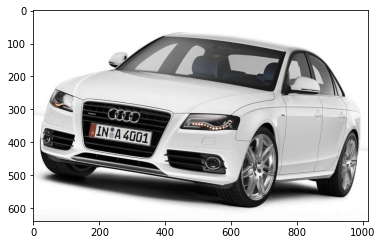

In [15]:
plt.imshow(img)
plt.show()

SIFT descriptors are obtained from grayscale images. The grayscale-version of the given colour-image is calculated as follows:

In [16]:
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

## Create SIFT-object

Next, a SIFT object is created. The parameters of the corresponding method are:
* `nfeature`:	The number of best features to retain (if it's value is >0)
* `nOctaveLayers`:	The number of layers in each octave. 3 is the value used in {cite}[Lowe04]. The number of octaves is computed automatically from the image resolution.
* `contrastThreshold`:	The contrast threshold used to filter out weak features. The larger the threshold, the less features are produced by the detector.
* `edgeThreshold`:	The threshold used to filter out edge-like features. The larger the edgeThreshold, the less features are filtered out.
* `sigma`:	The sigma of the Gaussian applied to the input image at the octave 0. 

In [17]:
sift = cv2.SIFT_create(nfeatures = 0,edgeThreshold=6,contrastThreshold=0.04,nOctaveLayers=3,sigma=1.6)

## Determine Keypoints
The SIFT-object's `detect()`-method is applied to find all keypoints. The found keypoints are then drawn into the image. The resulting image is saved in the local filesystem and displayed in the notebook.

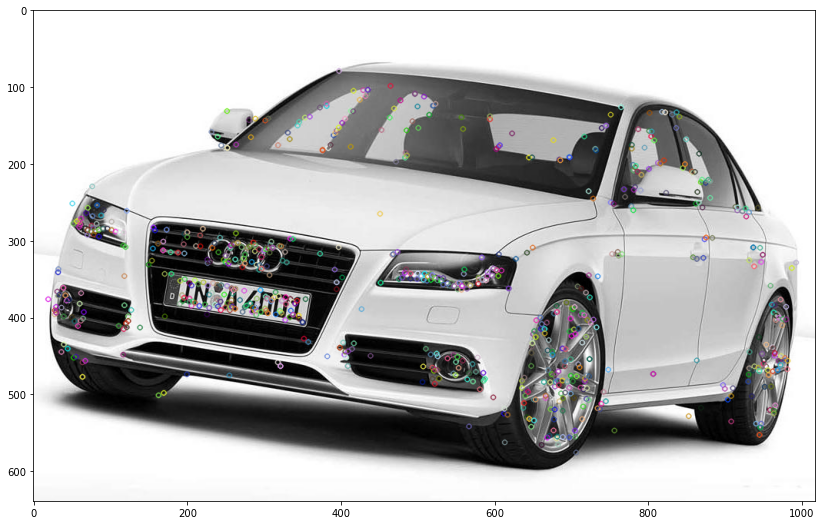

In [18]:
kp = sift.detect(gray,None)
img=cv2.drawKeypoints(gray,kp,img)
cv2.imwrite(out,img)
plt.figure(figsize=(14,10))
plt.imshow(img)
plt.show()

In the code cell above only the keypoint locations have been plotted into the image. However, also their orientation and size (the scale in which the keypoint has been detected) can be displayed, using the `flags`-argument of the `drawKeypoints()`-function.

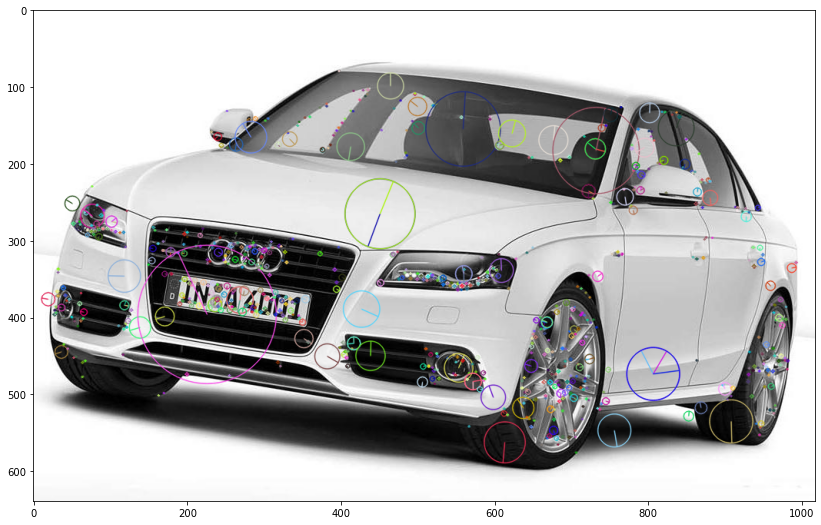

In [19]:
img=cv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite(out,img)
plt.figure(figsize=(14,12))
plt.imshow(img)
plt.show()

## Calculate SIFT descriptors for all keypoints

The SIFT descriptors are numeric vectors of length 128. These descriptors can be calculated from the already computed keypoints as follows:

In [20]:
kp, descriptor=sift.compute(gray,kp)

Alternatively, keypoints and descriptors can be calculated within one function: 

In [21]:
kp, descriptor = sift.detectAndCompute(gray,None)

In [22]:
print("Number of keypoints: {}".format(len(kp)))

Number of keypoints: 909


In [23]:
print("Shape of descriptor-array: {}".format(descriptor.shape))

Shape of descriptor-array: (909, 128)


In [24]:
idx=0
print("Coordinates of keypoint {0}: {1}".format(idx,kp[idx].pt))
print("Angle of keypoint {0}: {1}".format(idx,kp[idx].angle))
print("Magnitude of keypoint {0}: {1}".format(idx,kp[idx].size))

Coordinates of keypoint 0: (19.338401794433594, 375.9156799316406)
Angle of keypoint 0: 189.79811096191406
Magnitude of keypoint 0: 17.5046443939209
